# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Test_data (2).csv")

# Data Understanding 

In [3]:
#check datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22456 entries, 0 to 22455
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           22456 non-null  int64 
 1   department            22456 non-null  object
 2   region                22456 non-null  object
 3   education             22456 non-null  object
 4   gender                22456 non-null  object
 5   recruitment_channel   22456 non-null  object
 6   no_of_trainings       22456 non-null  int64 
 7   age                   22456 non-null  int64 
 8   previous_year_rating  22456 non-null  int64 
 9   length_of_service     22456 non-null  int64 
 10  KPIs_met >80%         22456 non-null  int64 
 11  awards_won?           22456 non-null  int64 
 12  avg_training_score    22456 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.2+ MB


In [4]:
# check nulls
df.isnull().sum()/len(df)*100

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

In [5]:
# check duplicates
df.nunique()

employee_id             22456
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        6
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

# Data Reduction 

In [6]:
df.dropna(subset="previous_year_rating", inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22456 entries, 0 to 22455
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           22456 non-null  int64 
 1   department            22456 non-null  object
 2   region                22456 non-null  object
 3   education             22456 non-null  object
 4   gender                22456 non-null  object
 5   recruitment_channel   22456 non-null  object
 6   no_of_trainings       22456 non-null  int64 
 7   age                   22456 non-null  int64 
 8   previous_year_rating  22456 non-null  int64 
 9   length_of_service     22456 non-null  int64 
 10  KPIs_met >80%         22456 non-null  int64 
 11  awards_won?           22456 non-null  int64 
 12  avg_training_score    22456 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.2+ MB


In [8]:
df.reset_index(drop=True, inplace = True)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61


In [9]:
df['employee_id'] = df['employee_id'].astype('object')

In [10]:
df["region"] = df["region"].astype("object")

In [11]:
df['employee_id'] = df['employee_id'].astype(str)
df['region'] = df['region'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22456 entries, 0 to 22455
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           22456 non-null  object
 1   department            22456 non-null  object
 2   region                22456 non-null  object
 3   education             22456 non-null  object
 4   gender                22456 non-null  object
 5   recruitment_channel   22456 non-null  object
 6   no_of_trainings       22456 non-null  int64 
 7   age                   22456 non-null  int64 
 8   previous_year_rating  22456 non-null  int64 
 9   length_of_service     22456 non-null  int64 
 10  KPIs_met >80%         22456 non-null  int64 
 11  awards_won?           22456 non-null  int64 
 12  avg_training_score    22456 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.2+ MB


# Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['gender'] = df['gender'].map({'m':0, 'f':1})

In [14]:
df['age_group'] = df['age'] // 10

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22456 entries, 0 to 22455
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           22456 non-null  object
 1   department            22456 non-null  object
 2   region                22456 non-null  int64 
 3   education             22456 non-null  object
 4   gender                22456 non-null  int64 
 5   recruitment_channel   22456 non-null  object
 6   no_of_trainings       22456 non-null  int64 
 7   age                   22456 non-null  int64 
 8   previous_year_rating  22456 non-null  int64 
 9   length_of_service     22456 non-null  int64 
 10  KPIs_met >80%         22456 non-null  int64 
 11  awards_won?           22456 non-null  int64 
 12  avg_training_score    22456 non-null  int64 
 13  age_group             22456 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 2.4+ MB


In [16]:
df.drop('age', axis=1, inplace=True)

In [17]:
df.head().T

,0,1,2,3,4
employee_id,8724,74430,72255,38562,64486
department,Technology,HR,Sales & Marketing,Procurement,Finance
region,18,28,4,11,21
education,Bachelor's,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,0,1,0,1,0
recruitment_channel,sourcing,other,other,other,sourcing
no_of_trainings,1,1,1,3,1
previous_year_rating,0,3,1,2,4
length_of_service,1,5,4,9,7
KPIs_met >80%,1,0,0,0,0


# Exploratory Data Analytics 

### Univariate Analysis 

In [18]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
region,22456.0,15.0,9.0,0.0,11.0,14.0,22.0,33.0
gender,22456.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
no_of_trainings,22456.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
previous_year_rating,22456.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0
length_of_service,22456.0,6.0,4.0,1.0,3.0,5.0,7.0,34.0
KPIs_met >80%,22456.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
awards_won?,22456.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
avg_training_score,22456.0,63.0,13.0,39.0,51.0,60.0,76.0,99.0
age_group,22456.0,3.0,1.0,2.0,2.0,3.0,3.0,6.0


- Several binary variables (gender, KPIs) show no variation → possible data quality issues.

- Employee training participation is very low for most but with a few high values → right-skewed.

- Employee performance metrics (rating, training score) have healthy variance → useful for modeling.

- Tenure is mostly moderate, but a few employees have very long service periods.

In [19]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

In [20]:
cat_cols

['employee_id', 'department', 'education', 'recruitment_channel']

<Axes: xlabel='count', ylabel='department'>

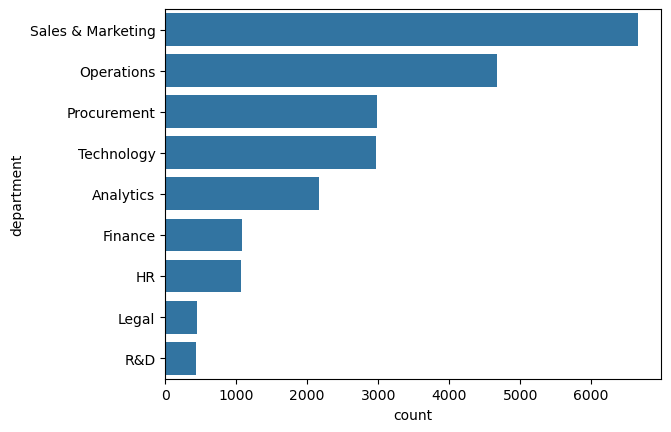

In [21]:
sns.countplot(df["department"], order = df["department"].value_counts().index)

- Sales & Marketing has the highest number of employees in the dataset.

- Operations is the second-largest department, with a count slightly lower than Sales & Marketing.

- Procurement, Technology, and Analytics fall in the mid-range with moderate employee counts.

- Finance and HR have noticeably fewer employees compared to the larger departments.

- Legal and R&D have the smallest number of employees among all departments.

- Overall, the employee distribution is uneven, with some departments showing very high counts while others have relatively low counts.

<Axes: xlabel='count', ylabel='education'>

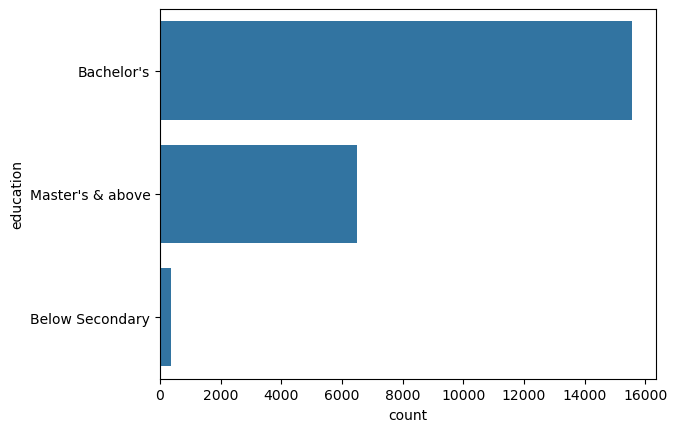

In [22]:
sns.countplot(df["education"], order = df["education"].value_counts().index)

- Bachelor’s is the most common education level in the dataset, with the highest number of employees.

- Master’s & above is the second most common group, with roughly half the count of Bachelor’s.

- Below Secondary has the smallest count, showing very few employees fall into this category.

- Overall, the dataset shows a high concentration of employees in the Bachelor’s and Master’s categories, with very few entries in the Below Secondary category.

<Axes: xlabel='count', ylabel='recruitment_channel'>

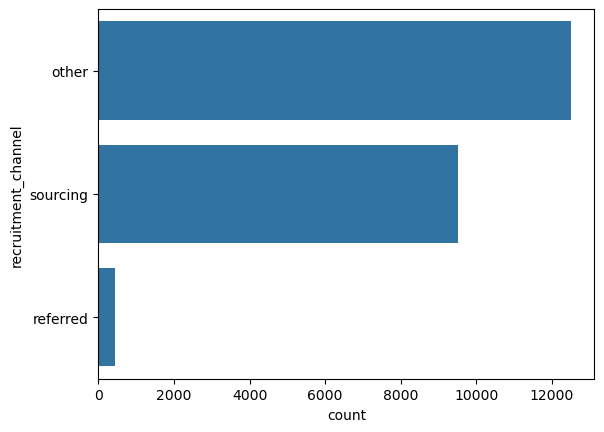

In [23]:
sns.countplot(df["recruitment_channel"], order = df["recruitment_channel"].value_counts().index)

- The ‘other’ recruitment channel has the highest number of entries in the dataset.

- The ‘sourcing’ channel is the second most common, with a count slightly lower than ‘other’.

- The ‘referred’ channel has the smallest count, with very few entries compared to the other two categories.

- Overall, the distribution is uneven, with ‘other’ and ‘sourcing’ dominating most of the dataset while ‘referred’ represents only a small proportion.

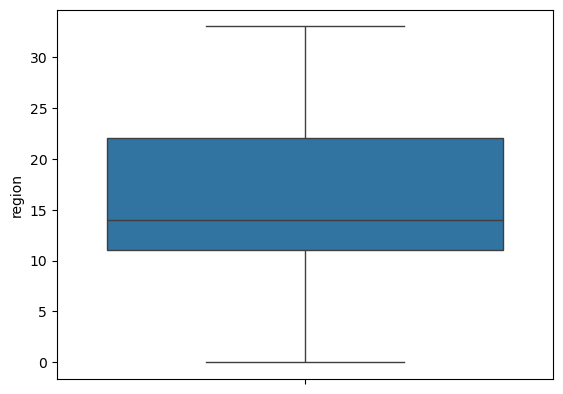

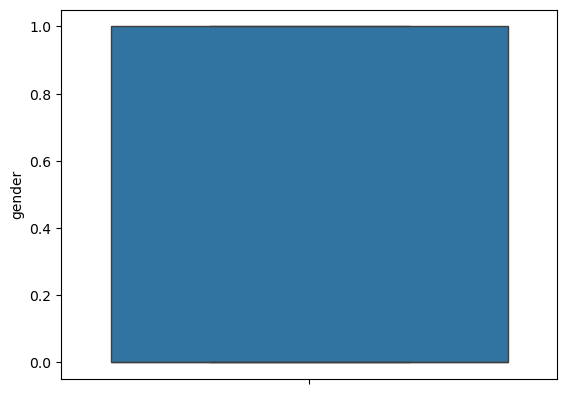

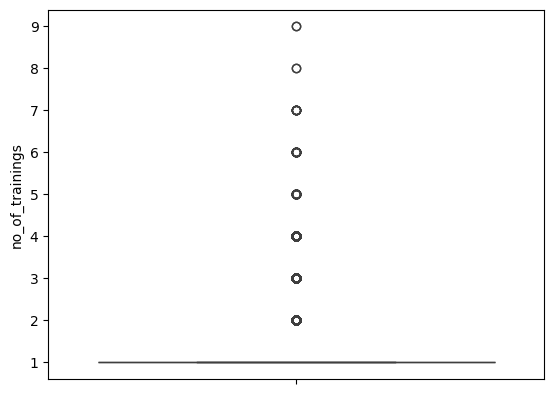

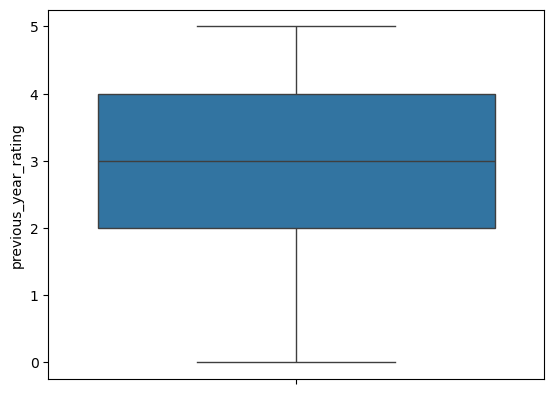

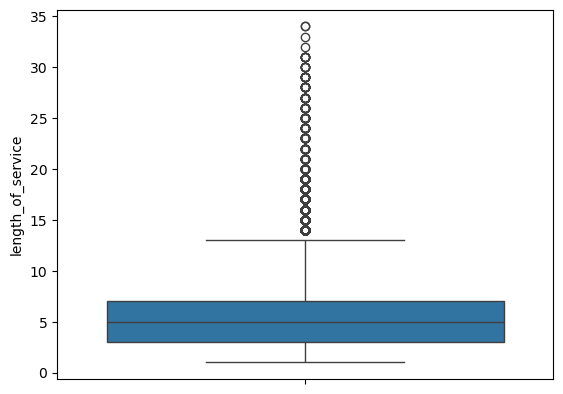

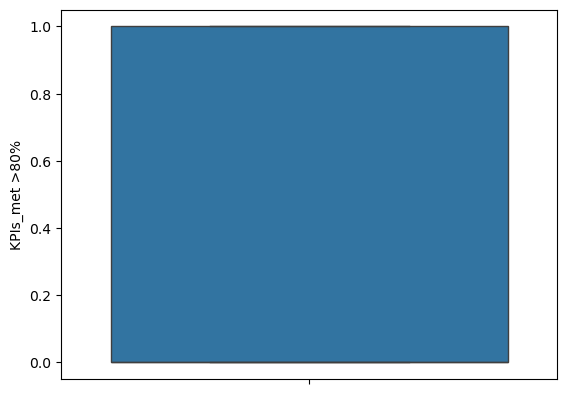

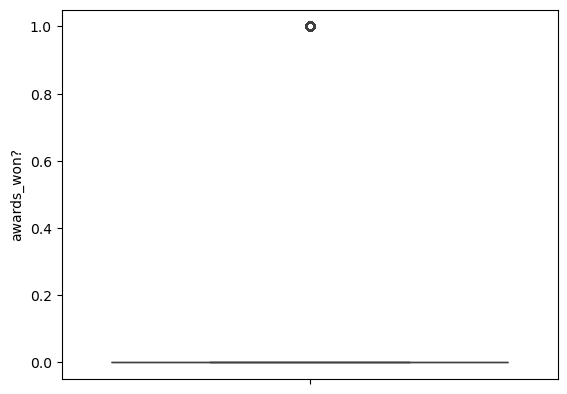

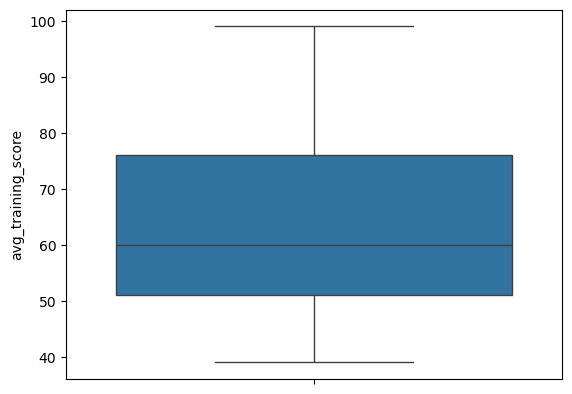

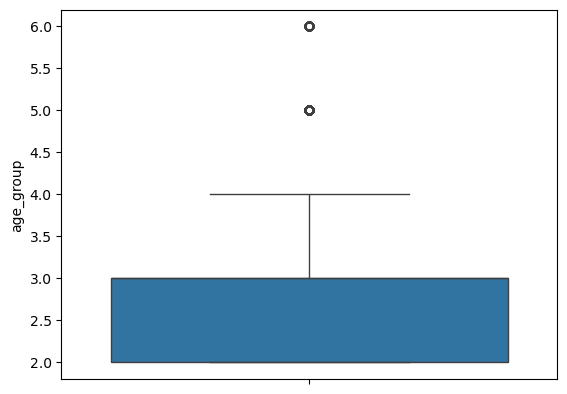

In [24]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [25]:
cln_col = True   # start with all True (boolean mask)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    cln_col &= (df[col] >= lower) & (df[col] <= upper)

# outside the loop
df_cleaned = df[cln_col]

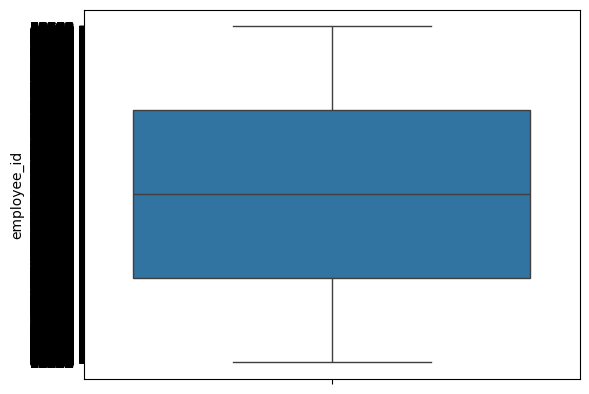

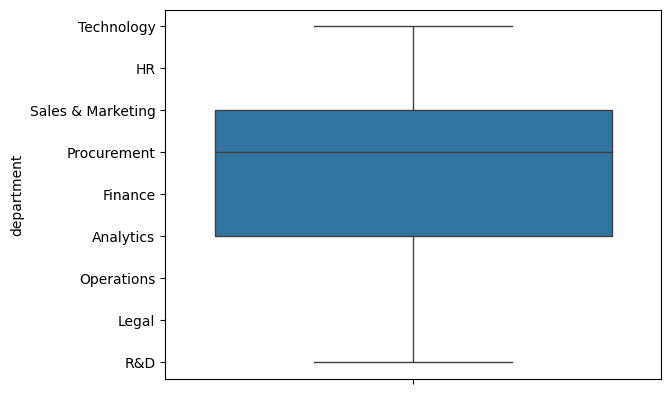

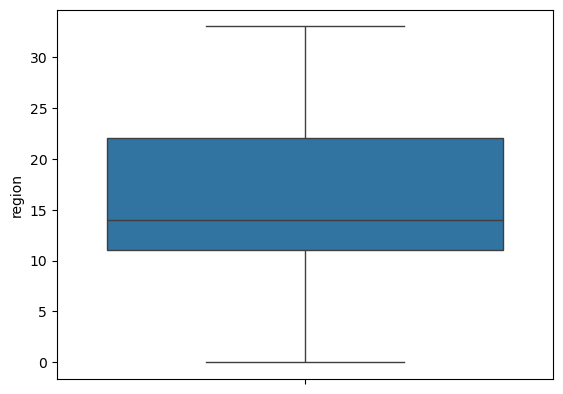

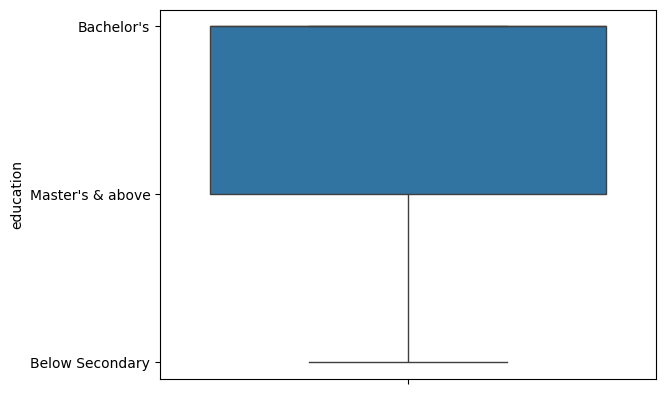

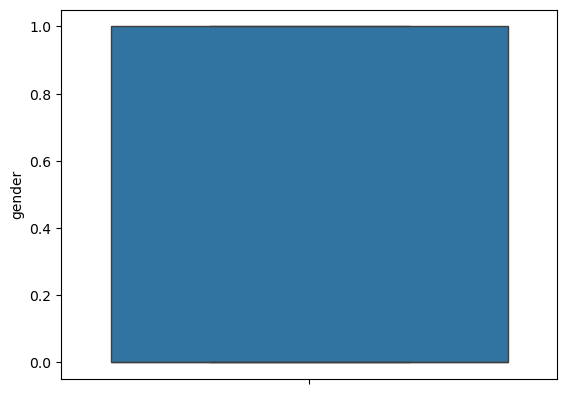

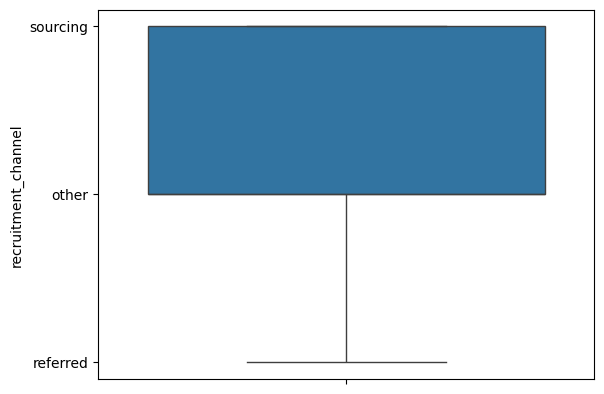

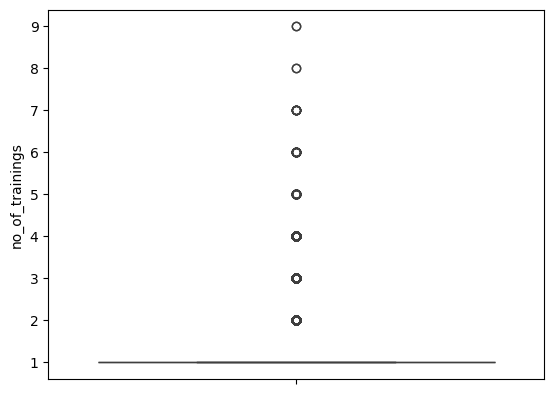

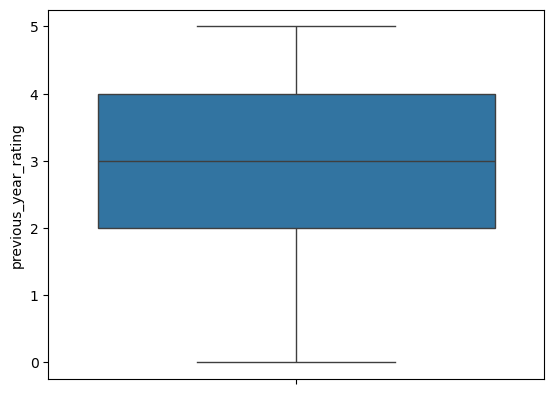

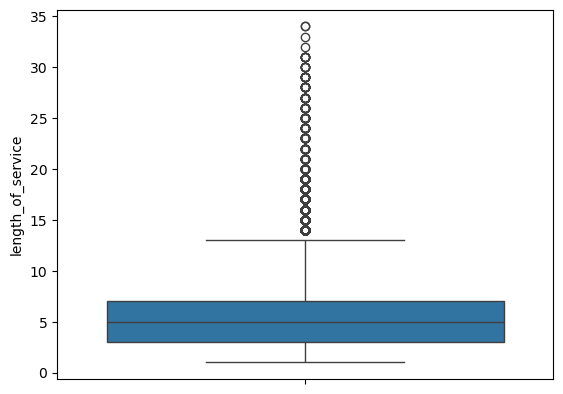

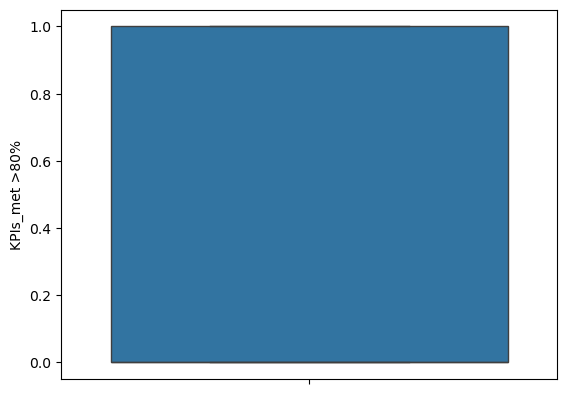

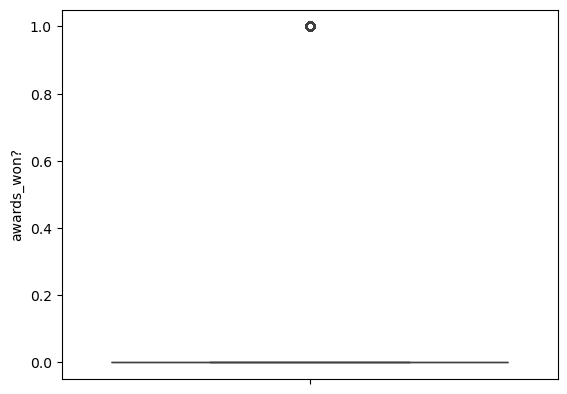

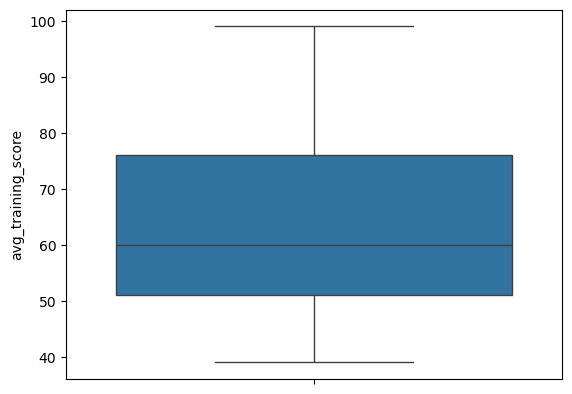

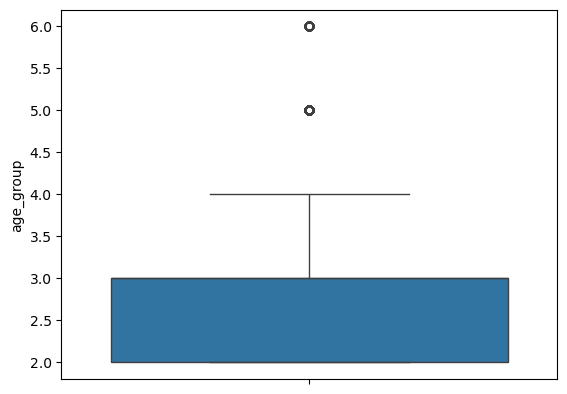

In [26]:
for col in df_cleaned:
    sns.boxplot(df[col])
    plt.show()

# Bivariate Analysis 

<Figure size 1200x800 with 0 Axes>

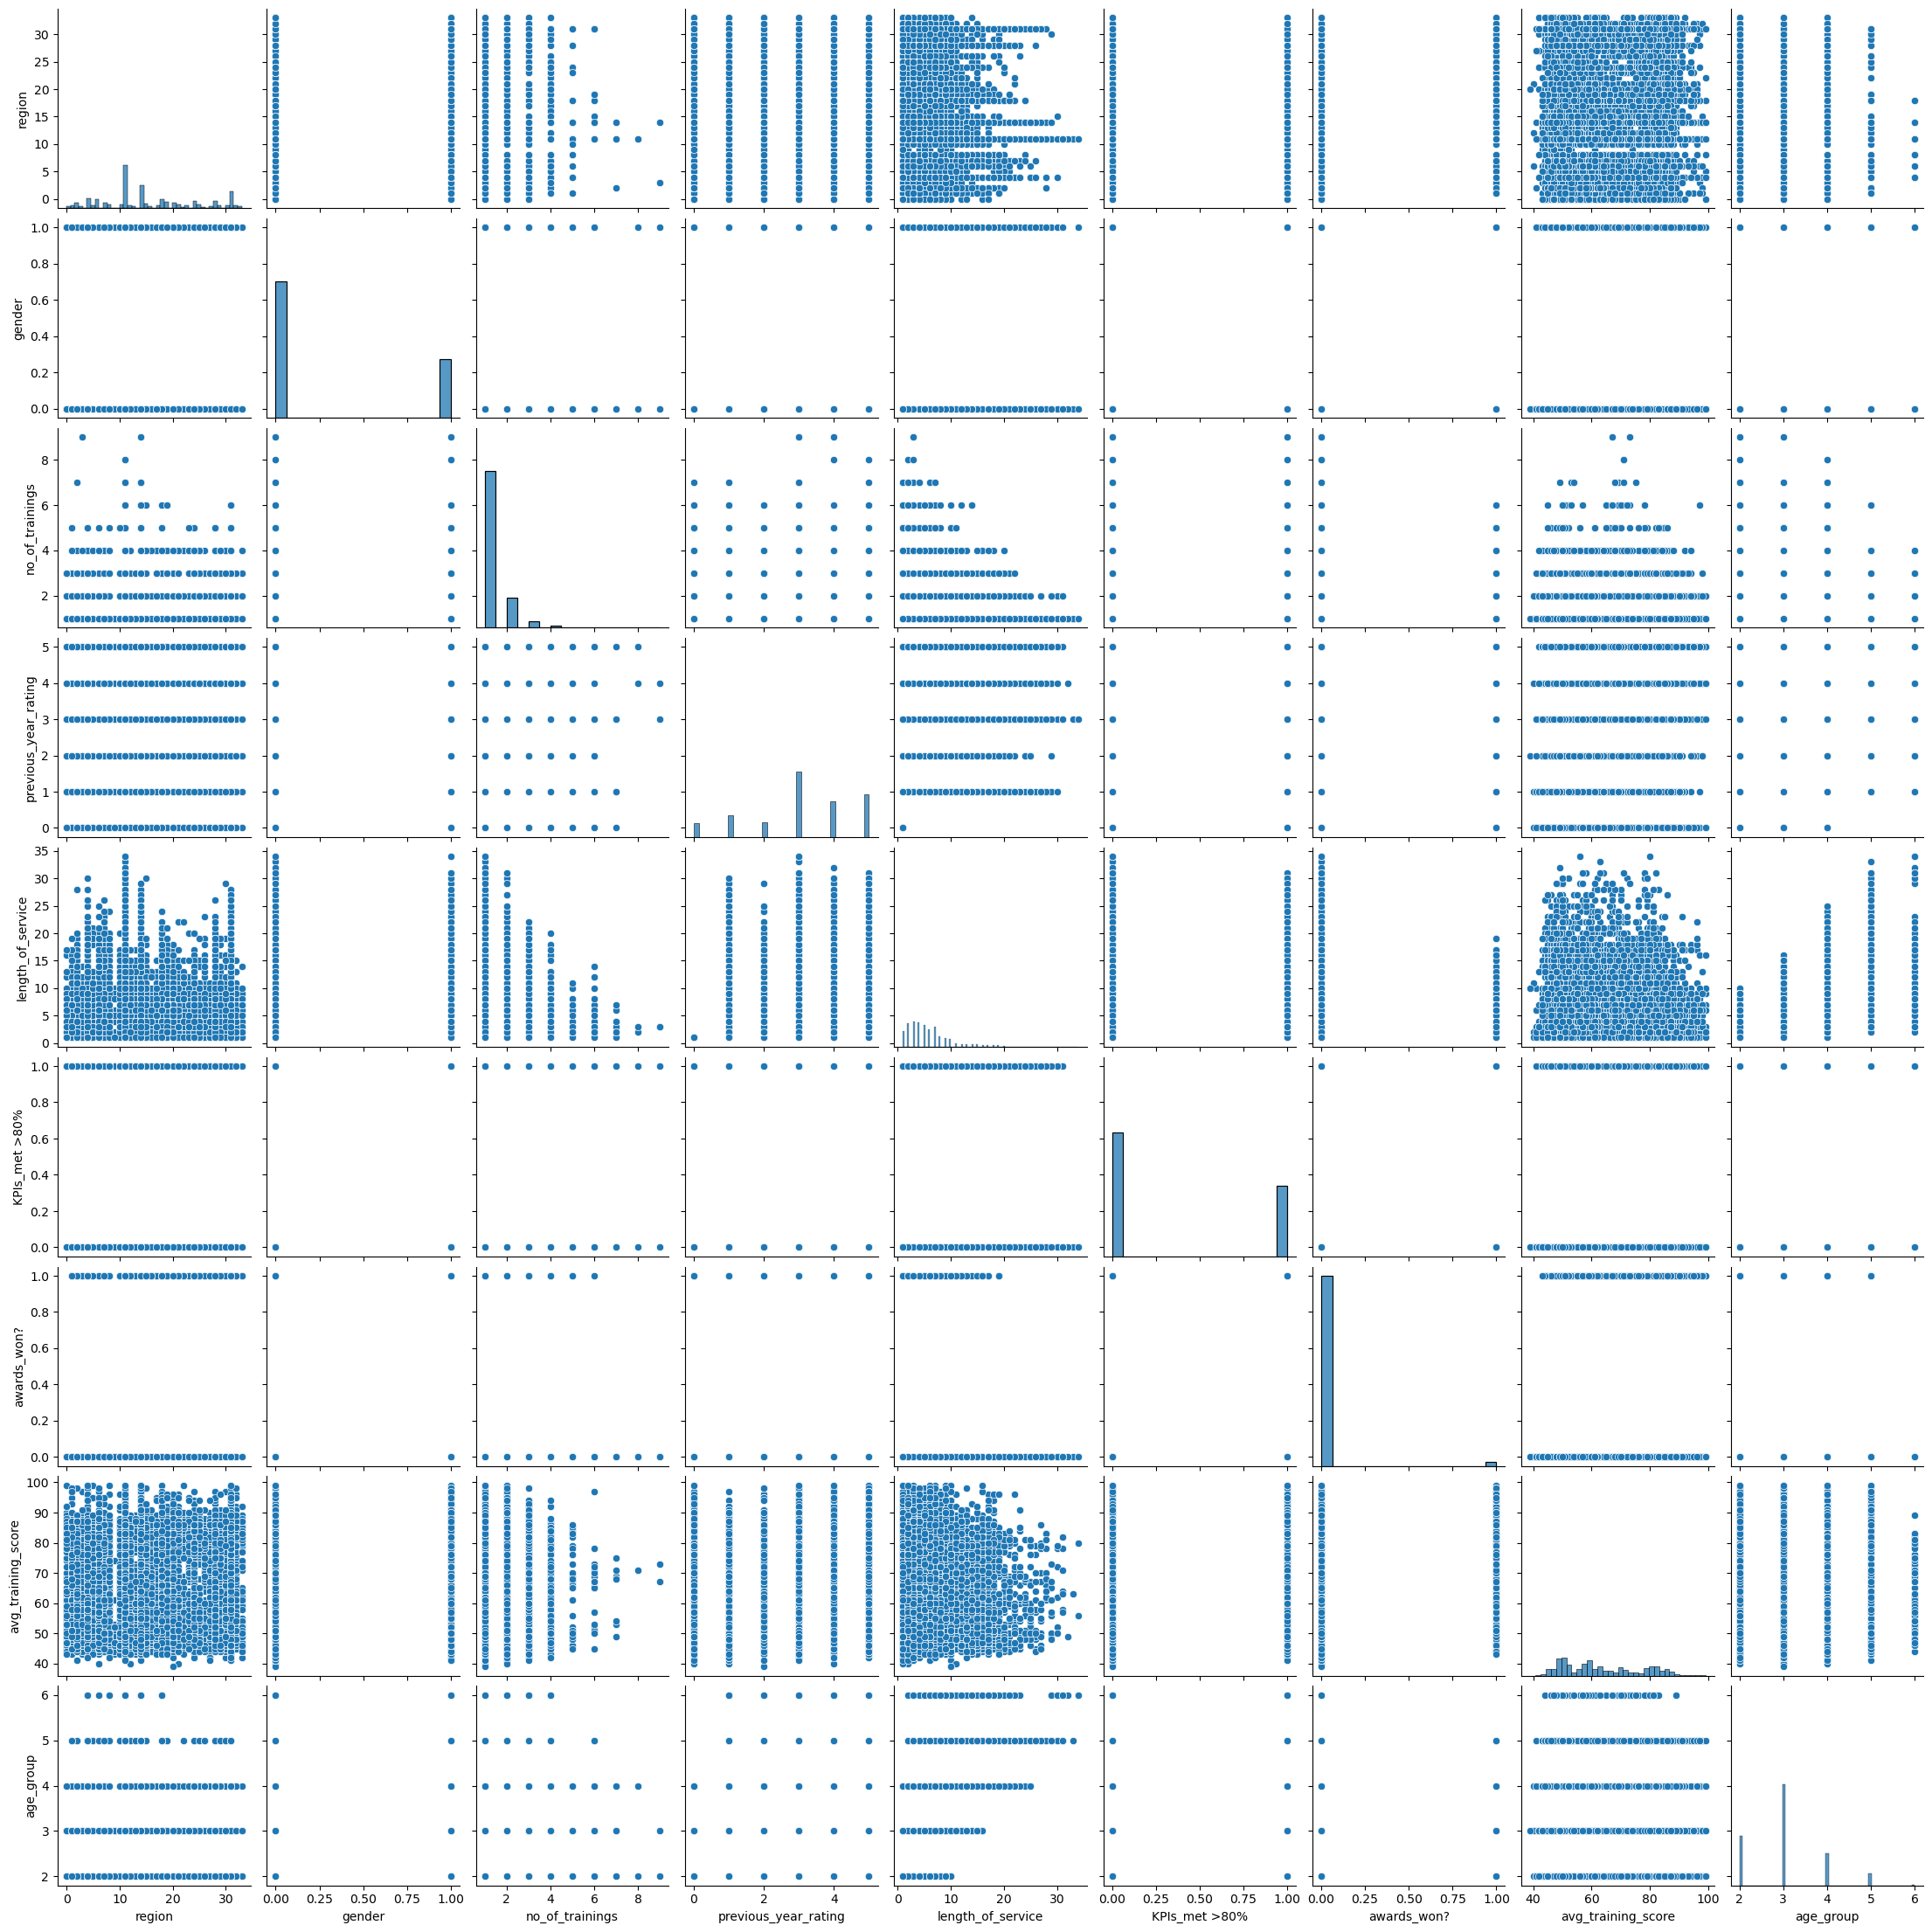

In [27]:
plt.figure(figsize=(12,8))
sns.pairplot(data = df)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22456 entries, 0 to 22455
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           22456 non-null  object
 1   department            22456 non-null  object
 2   region                22456 non-null  int64 
 3   education             22456 non-null  object
 4   gender                22456 non-null  int64 
 5   recruitment_channel   22456 non-null  object
 6   no_of_trainings       22456 non-null  int64 
 7   previous_year_rating  22456 non-null  int64 
 8   length_of_service     22456 non-null  int64 
 9   KPIs_met >80%         22456 non-null  int64 
 10  awards_won?           22456 non-null  int64 
 11  avg_training_score    22456 non-null  int64 
 12  age_group             22456 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 2.2+ MB


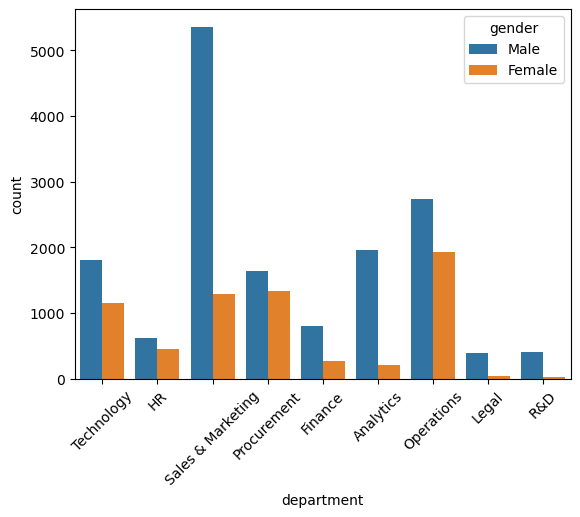

In [29]:
sns.countplot(
    data=df,
    x="department",
    hue=df["gender"].replace({0: "Male", 1: "Female"})
)
plt.xticks(rotation=45)
plt.show()

- Most departments are male-dominated, especially Sales & Marketing, Technology, Analytics, and Finance.
- Sales & Marketing has the highest number of male employees overall.
- Operations and Procurement show a more balanced gender distribution compared to other departments.
- HR has relatively higher female representation, but the total count is small.
- Legal and R&D have very few employees overall, with almost no female representation.

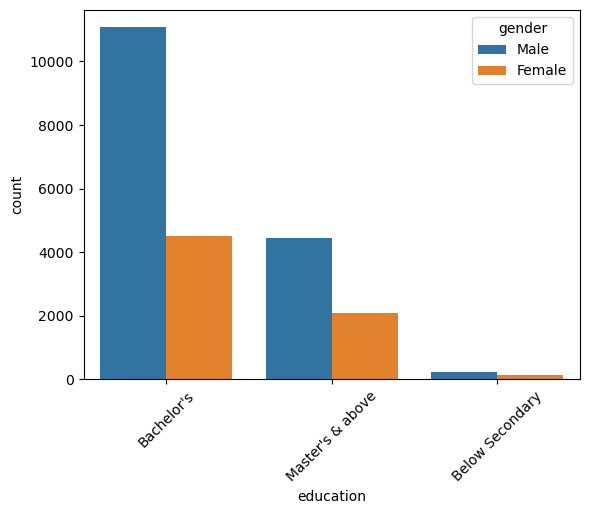

In [30]:
sns.countplot(
    data=df,
    x="education",
    hue=df["gender"].replace({0: "Male", 1: "Female"})
)
plt.xticks(rotation=45)
plt.show()

- Most employees have a Bachelor’s degree, with male employees being almost double the number of females.
- Employees with Master’s & above are fewer, but still show a clear male majority.
- Very few employees fall under the Below Secondary category, with both genders having minimal representation.
- Across all education levels, male employees dominate, showing a clear gender imbalance in higher education categories.
- The company workforce is mainly composed of Bachelor’s and Master’s degree holders.

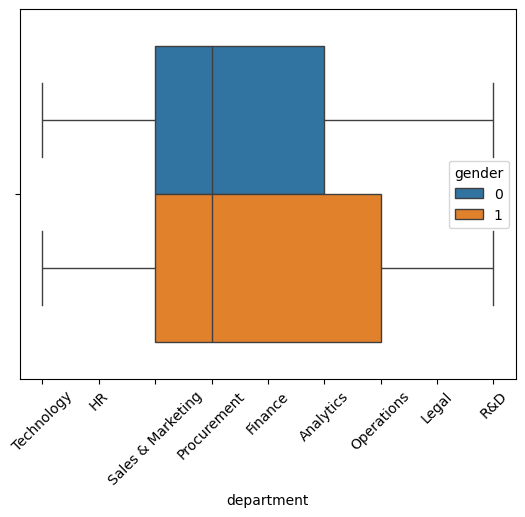

In [31]:
sns.boxplot(data =df, x = df["department"], hue = "gender")
plt.xticks (rotation = 45)
plt.show()

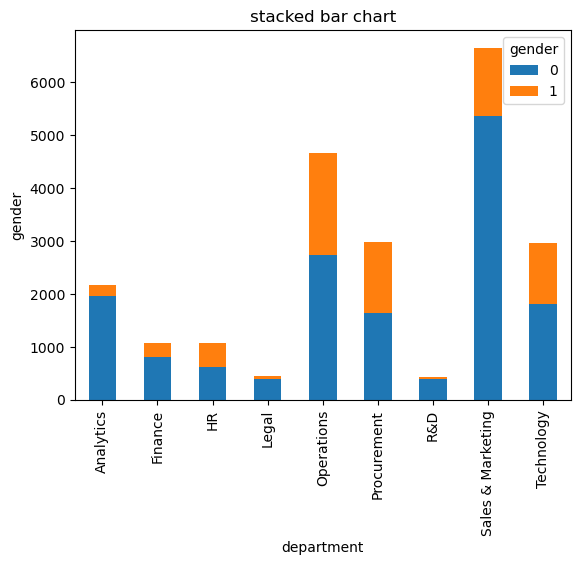

In [32]:
crosstab = pd.crosstab(df["department"], df["gender"])
crosstab.plot(kind= "bar" , stacked = True)
plt.title("stacked bar chart")
plt.xlabel("department")
plt.ylabel("gender")
plt.show()


# Multivariate Analysis 

In [33]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df.reset_index(drop=True, inplace = True)
numeric_df.corr().round(2)


,region,gender,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_group
region,1.00,-0.04,0.00,-0.02,-0.07,0.01,0.02,0.03,-0.10
gender,-0.04,1.00,-0.09,0.02,0.00,0.04,0.00,0.02,0.01
no_of_trainings,0.00,-0.09,1.00,-0.06,-0.06,-0.04,0.00,0.04,-0.09
previous_year_rating,-0.02,0.02,-0.06,1.00,0.19,0.27,0.02,0.04,0.19
length_of_service,-0.07,0.00,-0.06,0.19,1.00,-0.08,-0.04,-0.04,0.61
KPIs_met >80%,0.01,0.04,-0.04,0.27,-0.08,1.00,0.11,0.07,-0.03
awards_won?,0.02,0.00,0.00,0.02,-0.04,0.11,1.00,0.07,-0.01
avg_training_score,0.03,0.02,0.04,0.04,-0.04,0.07,0.07,1.00,-0.05
age_group,-0.10,0.01,-0.09,0.19,0.61,-0.03,-0.01,-0.05,1.00


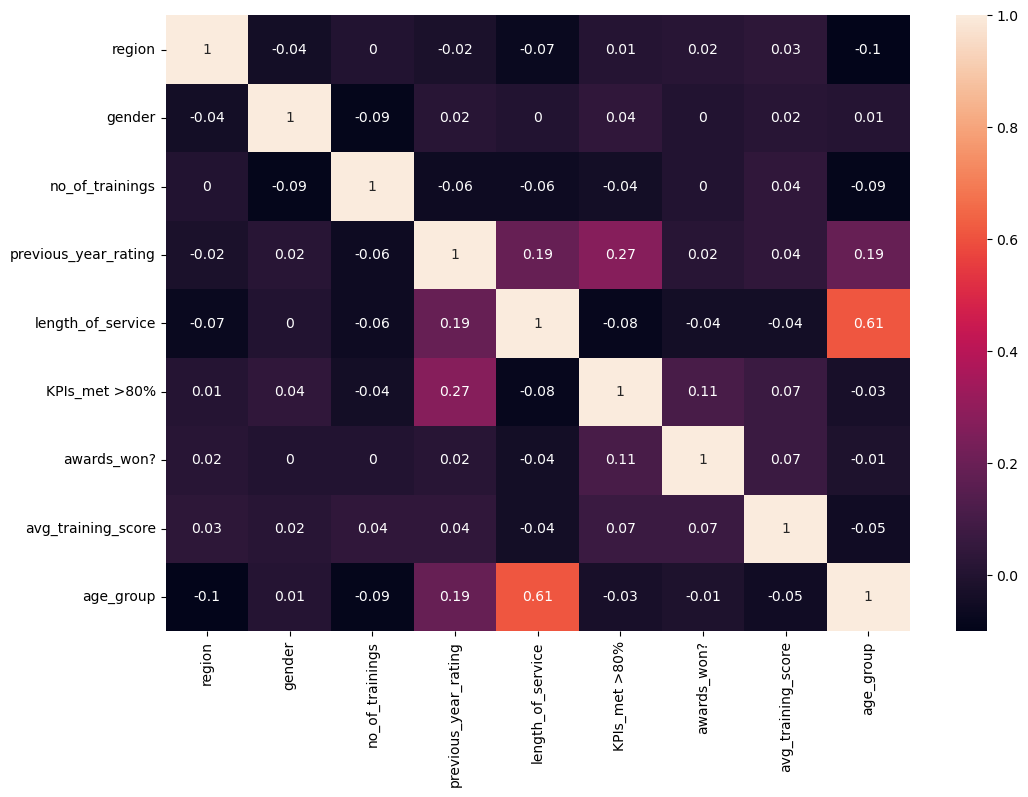

In [34]:
plt.figure(figsize= (12,8))
sns.heatmap(numeric_df.corr().round(2), annot = True)
plt.show()

# Data Modeling

## Linear Regression 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools import add_constant

In [36]:
corr_matrix = numeric_df.corr()
corr_matrix["KPIs_met >80%"].sort_values(ascending=False)

KPIs_met >80%           1.000000
previous_year_rating    0.270243
awards_won?             0.109449
avg_training_score      0.066214
gender                  0.036797
region                  0.005714
age_group              -0.027665
no_of_trainings        -0.042050
length_of_service      -0.081762
Name: KPIs_met >80%, dtype: float64

In [37]:
features = ["previous_year_rating", "awards_won?","avg_training_score", "gender", "region", "age_group", "no_of_trainings","length_of_service"]
X = numeric_df[features]
X

,previous_year_rating,awards_won?,avg_training_score,gender,region,age_group,no_of_trainings,length_of_service
0,0,0,77,0,18,2,1,1
1,3,0,51,1,28,3,1,5
2,1,0,47,0,4,3,1,4
3,2,0,65,1,11,3,3,9
4,4,0,61,0,21,3,1,7
...,...,...,...,...,...,...,...,...
22451,3,0,61,0,11,2,1,1
22452,3,0,74,0,17,3,1,7
22453,4,0,50,1,7,2,1,4
22454,0,0,70,0,24,2,3,1


In [38]:
X_const = add_constant(X)
X_const

,const,previous_year_rating,awards_won?,avg_training_score,gender,region,age_group,no_of_trainings,length_of_service
0,1.0,0,0,77,0,18,2,1,1
1,1.0,3,0,51,1,28,3,1,5
2,1.0,1,0,47,0,4,3,1,4
3,1.0,2,0,65,1,11,3,3,9
4,1.0,4,0,61,0,21,3,1,7
...,...,...,...,...,...,...,...,...,...
22451,1.0,3,0,61,0,11,2,1,1
22452,1.0,3,0,74,0,17,3,1,7
22453,1.0,4,0,50,1,7,2,1,4
22454,1.0,0,0,70,0,24,2,3,1


In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,previous_year_rating,1.051780
1,awards_won?,1.008846
2,avg_training_score,1.013224
3,gender,1.009845
4,region,1.012113
5,age_group,1.617585
6,no_of_trainings,1.019196
7,length_of_service,1.610228


In [40]:
y = numeric_df["KPIs_met >80%"]
y

0        1
1        0
2        0
3        0
4        0
        ..
22451    0
22452    0
22453    0
22454    0
22455    1
Name: KPIs_met >80%, Length: 22456, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
# split the data in training and test sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(15045, 7411, 15045, 7411)

In [44]:
# create the instance of the model 

In [45]:
model = LinearRegression()

In [46]:
# fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.intercept_, model.coef_.round(2)

(np.float64(0.11856541250227223),
 array([ 0.09,  0.31,  0.  ,  0.04,  0.  , -0.01, -0.03, -0.01]))

In [48]:
# model valuation 
y_pred = model.predict = model.predict(X_test)

In [49]:
y_test, y_pred

(17414    0
 9606     1
 21963    0
 15413    1
 19085    0
         ..
 19654    0
 10205    0
 12749    0
 662      1
 8086     0
 Name: KPIs_met >80%, Length: 7411, dtype: int64,
 array([0.34972125, 0.51572111, 0.24811465, ..., 0.36793228, 0.54880452,
        0.10671117]))

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [51]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
r_sq_score = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [52]:
print(f"mae:{mae}\nmse:{mse}:\nrmse:{rmse}\nr2_score:{r_sq_score}")

mae:0.4153910303497262
mse:0.2073514330755497:
rmse:0.45535857637201665
r2_score:0.10760057187325289


## DT Classsifier

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [54]:
len(X_train),len(X_test) 

(15045, 7411)

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
model_gini= DecisionTreeRegressor(random_state= 42)

In [57]:
model_gini.fit(X_train , y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
y_pred_ent = model_gini.predict(X_test)

In [59]:
from sklearn.metrics import  confusion_matrix, classification_report #(true,false)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ent)
mse = mean_squared_error(y_test, y_pred_ent)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_ent)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.3978995187334142
Mean Squared Error: 0.3901860597610159
Root Mean Squared Error: 0.6246487491070609
R² Score: -0.6792833858393927


## Clustering

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [64]:
cluster_models = [KMeans(n_clusters=3,  random_state = 42), AgglomerativeClustering(n_clusters=3), DBSCAN()]

### for model in cluster_models:
    labels = model.fit_predict(X_scaled)
    print(f"{model}_labels_ = {labels}")

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [67]:
len(X_pca), len(X_scaled)

(22456, 22456)

In [68]:
pca.components_

array([[ 0.33476613, -0.04290539, -0.07433189,  0.040116  , -0.15542006,
         0.64554808, -0.16365483,  0.64131553],
       [ 0.34122059,  0.61206905,  0.67345545,  0.12777582,  0.19676696,
        -0.00344294,  0.01365925, -0.0124668 ]])

In [69]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

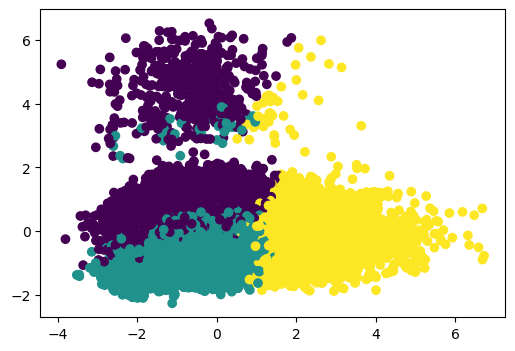

In [70]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= kmeans_labels )
plt.show()

In [71]:
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

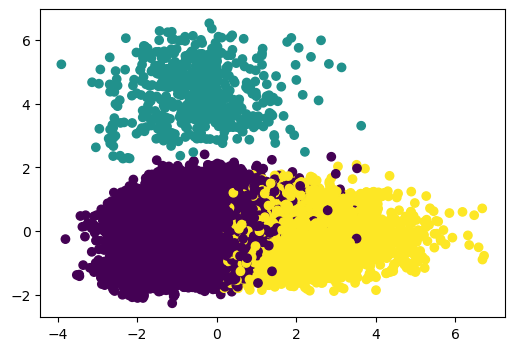

In [72]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= agg_labels )
plt.show()

In [73]:
dbscan = DBSCAN(eps=0.5)
dbscan_labels = dbscan.fit_predict(X_scaled)

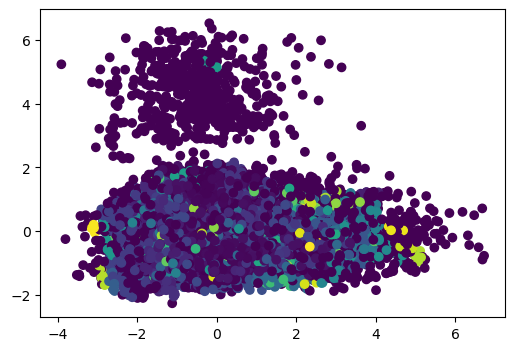

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= dbscan_labels )
plt.show()

## Bagging Regressor

In [75]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [76]:
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)


In [77]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),  # Base estimator
    n_estimators=50,
    max_samples=0.7,  # Use 70% of the training data for each base estimator
    bootstrap=True,
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel processing
)

In [78]:
bagging_clf.fit(X_train_clf, y_train_clf)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=0.7, n_estimators=50, n_jobs=-1, random_state=42)

In [79]:
y_pred_clf = bagging_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.8600
